In [31]:
import numpy as np
import imageio
import math
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

# https://alyssaq.github.io/2014/understanding-hough-transform/

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint16)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)# this is to create a mask of non zeros
#     print(x_idxs.shape," IDs ",y_idxs.shape," are_edges ", are_edges.shape)
    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1
    return accumulator, thetas, rhos


def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()




In [32]:
#  help to remove overlapped lines
def remove_overlapped_line(accumulator, vote_threshold):
    mask = accumulator < vote_threshold
    accumulator[mask] = 0
    x_id,y_id = np.nonzero(accumulator)
    return accumulator

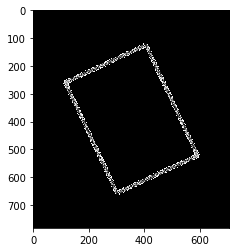

In [33]:
img_1 = np.zeros((640,480))
img_1[100:-100,80:-80] = 250
img_1[102:-102,81:-81] = 0
img_2 = np.dstack((img_1,img_1,img_1))
img_3 = ndimage.rotate(img_2,25,mode='constant')
plt.imshow(img_3)

(2108, 180) <class 'numpy.uint16'>  max  444 0.0 0


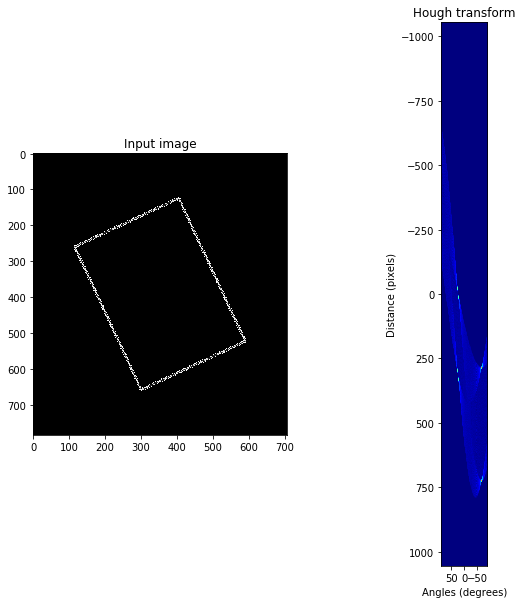

In [38]:
if __name__ == '__main__':
#     imgpath = 'hough_transform/imgs/binary_crosses.png'
#     img = imageio.imread(imgpath)
    img = img_3
    if img.ndim == 3:
        img = rgb2gray(img)
    accumulator, thetas, rhos = hough_line(img)
    print(accumulator.shape,type(accumulator[1,1]), " max ", np.max(accumulator), np.median(accumulator), np.min(accumulator))
    show_hough_line(img, accumulator, thetas, rhos,save_path='hough_transform/imgs/output.png')

88103
410


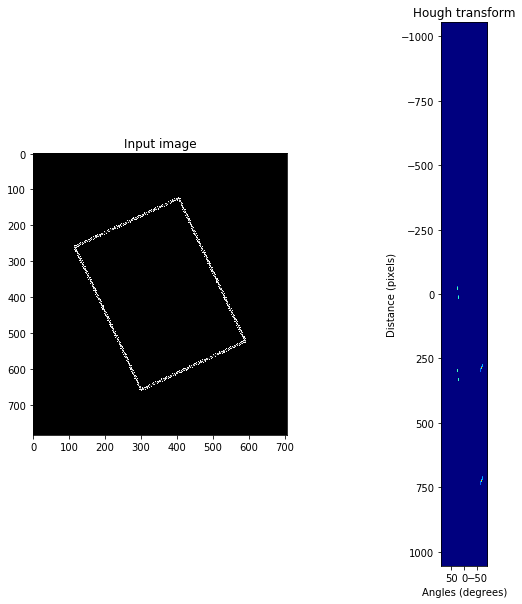

[[ 2  0  6]
 [ 1  1  1]
 [ 2  3  4]
 [ 0  0 -1]] (4, 3)
6


In [39]:
x,y = np.nonzero(accumulator)
print(len(x))
accumulator = remove_overlapped_line(accumulator,50)
x,y = np.nonzero(accumulator)
print(len(x))
show_hough_line(img, accumulator, thetas, rhos,save_path='hough_transform/imgs/output.png')
a = np.array([[2,0,6],[1,1,1],[2,3,4],[0,0,-1]])
print(a, a.shape)
print(np.max(a))

[ 46  46  47 ..., 209 210 211]  IDs  [ 29  30  30 ..., 235 235 235]


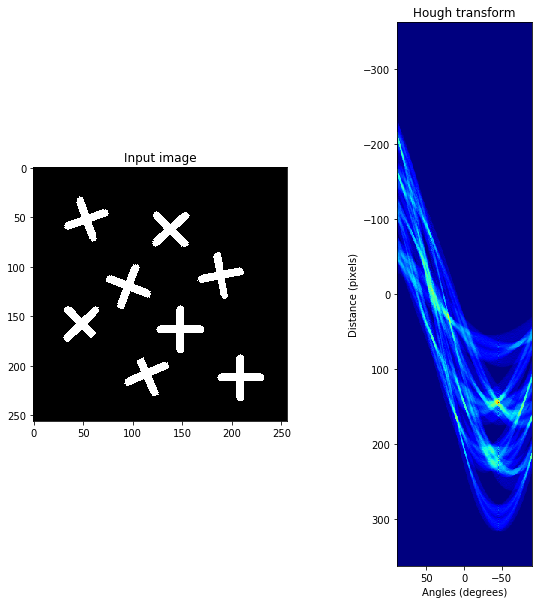

In [119]:
if __name__ == '__main__':
    imgpath = 'hough_transform/imgs/binary_crosses.png'
    img = imageio.imread(imgpath)
    if img.ndim == 3:
        img = rgb2gray(img)
    accumulator, thetas, rhos = hough_line(img)
    show_hough_line(img, accumulator, thetas, rhos,save_path='hough_transform/imgs/output.png')